## Bioinformatics - Data Collection and Pre-Processing

In [85]:
! pip install chembl_webresource_client
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [86]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.00,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.00,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.00,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.00,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.00,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.00,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.00,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.00,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.00,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.00,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [87]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [88]:
df = pd.DataFrame.from_dict(res)
df

KeyboardInterrupt: 

In [ ]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (8832, 46) and (7547, 46)


### Data Pre-processing
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")
len(bioactivity_class)

7547

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
print(bioactivity_class.shape,df3.shape,df4.shape)
df4

(7547,) (7547, 3) (7547, 4)


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.0,intermediate


In [ ]:
df4.to_csv('data/bioactivity.csv',index = False)

## Exploratory Data Anlysis

In [89]:
import pandas as pd
df = pd.read_csv('data/bioactivity.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.00,active
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.00,inactive
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.00,inactive
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.00,intermediate


### Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

In [90]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
# my-rdkit-env (Python 3.11.4)

In [91]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row]) 
            # append array vertically [np.concatenate((baseData,row),axis = 0)]
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [92]:
for i,elem in enumerate(df.canonical_smiles):
    if type(elem) == float:
        print('false')
        print(i)

In [93]:
df_lipinski = lipinski(list(df.canonical_smiles))
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.33,2.80,0.00,6.00
1,376.91,4.55,0.00,5.00
2,426.85,5.36,0.00,5.00
3,404.85,4.71,0.00,5.00
4,346.33,3.10,0.00,6.00
...,...,...,...,...
7542,352.48,5.06,1.00,3.00
7543,287.25,2.20,1.00,4.00
7544,311.34,3.18,1.00,4.00
7545,198.27,2.70,1.00,2.00


In [94]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.33,2.80,0.00,6.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.91,4.55,0.00,5.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.85,5.36,0.00,5.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.85,4.71,0.00,5.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.33,3.10,0.00,6.00
...,...,...,...,...,...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.00,active,352.48,5.06,1.00,3.00
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.00,inactive,287.25,2.20,1.00,4.00
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.00,inactive,311.34,3.18,1.00,4.00
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,1180.00,intermediate,198.27,2.70,1.00,2.00


### Convert IC50 to pIC50
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [95]:
df_combined.standard_value.describe()

count       7547.00
mean       99561.65
std      1020431.91
min            0.00
25%           93.00
50%         1300.00
75%        12036.32
max     50000000.00
Name: standard_value, dtype: float64

In [96]:
df_combined = df_combined[df_combined.standard_value != 0]
df_combined.standard_value.describe()

count       7546.00
mean       99574.85
std      1020498.89
min            0.00
25%           93.00
50%         1300.00
75%        12043.16
max     50000000.00
Name: standard_value, dtype: float64

In [97]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000: i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)
        
    return x

In [98]:
df = norm_value(df_combined)
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,800.00
...,...,...,...,...,...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.48,5.06,1.00,3.00,274.00
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.25,2.20,1.00,4.00,76200.00
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.34,3.18,1.00,4.00,55000.00
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,intermediate,198.27,2.70,1.00,2.00,1180.00


In [99]:
df.standard_value_norm.describe()

count       7546.00
mean       99574.85
std      1020498.89
min            0.00
25%           93.00
50%         1300.00
75%        12043.16
max     50000000.00
Name: standard_value_norm, dtype: float64

In [100]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

In [101]:
df_final = pIC50(df)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...
7542,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.48,5.06,1.00,3.00,6.56
7543,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.25,2.20,1.00,4.00,4.12
7544,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.34,3.18,1.00,4.00,4.26
7545,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,intermediate,198.27,2.70,1.00,2.00,5.93


In [102]:
df_final.pIC50.describe()

count   7546.00
mean       5.99
std        1.59
min        1.30
25%        4.92
50%        5.89
75%        7.03
max       14.30
Name: pIC50, dtype: float64

### Removing the 'intermediate' bioactivity class
Here, we will be removing the ``intermediate`` class from our data set.

In [104]:
df_final.to_csv('data/final_data.csv',index = False)

In [105]:
df_final.shape

(7546, 8)

## Dataset Preparation

In [106]:
import pandas as pd
df = pd.read_csv('data/final_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...
7541,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.48,5.06,1.00,3.00,6.56
7542,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.25,2.20,1.00,4.00,4.12
7543,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.34,3.18,1.00,4.00,4.26
7544,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,intermediate,198.27,2.70,1.00,2.00,5.93


In [107]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [108]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/7546). 
Processing CHEMBL336398 in molecule.smi (2/7546). 
Processing CHEMBL130628 in molecule.smi (4/7546). 
Processing CHEMBL131588 in molecule.smi (3/7546). 
Processing CHEMBL130478 in molecule.smi (5/7546). 
Processing CHEMBL130112 in molecule.smi (6/7546). 
Processing CHEMBL130098 in molecule.smi (7/7546). 
Processing CHEMBL337486 in molecule.smi (8/7546). 
Processing CHEMBL336538 in molecule.smi (9/7546). 
Processing CHEMBL341437 in molecule.smi (11/7546). Average speed: 0.82 s/mol.
Processing CHEMBL131051 in molecule.smi (10/7546). Average speed: 2.31 s/mol.
Processing CHEMBL335033 in molecule.smi (12/7546). Average speed: 0.63 s/mol.
Processing CHEMBL122983 in molecule.smi (13/7546). Average speed: 0.51 s/mol.
Processing CHEMBL338720 in molecule.smi (14/7546). Average speed: 0.43 s/mol.
Processing CHEMBL339995 in molecule.smi (15/7546). Average speed: 0.43 s/mol.
Processing CHEMBL335158 in molecule.smi (16/7546). Average speed: 0.32 s/

In [109]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL337486,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,CHEMBL5219046,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7542,CHEMBL5219594,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7543,CHEMBL95,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7544,CHEMBL5219958,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df3_X = df3_X.drop(columns=['Name'])
df3_Y = df['pIC50']
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7542,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7543,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [111]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3.to_csv('data/data_XandY.csv', index=False)

## Model Comparisons

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [112]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('pIC50',axis = 1)
Y = df.pIC50
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.01)
X = selection.fit_transform(X)
X.shape

(7546, 456)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [55]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [114]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:35<00:00,  3.70s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:21<00:00,  3.38s/it]


In [115]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.77,0.79,0.73,0.28
ExtraTreeRegressor,0.77,0.79,0.73,0.27
ExtraTreesRegressor,0.77,0.79,0.73,13.61
GaussianProcessRegressor,0.77,0.79,0.73,12.86
RandomForestRegressor,0.72,0.74,0.81,9.50
BaggingRegressor,0.70,0.72,0.84,1.12
MLPRegressor,0.66,0.69,0.88,5.87
XGBRegressor,0.65,0.68,0.90,1.73
HistGradientBoostingRegressor,0.50,0.53,1.08,1.64


In [116]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.12,0.39,1.27,1.50
LGBMRegressor,0.12,0.39,1.27,0.51
SVR,0.07,0.35,1.31,9.20
RandomForestRegressor,0.07,0.35,1.31,9.53
NuSVR,0.07,0.35,1.31,6.89
XGBRegressor,0.05,0.33,1.32,1.73
BaggingRegressor,0.02,0.32,1.34,1.00
GradientBoostingRegressor,0.01,0.31,1.35,3.09
KNeighborsRegressor,0.00,0.30,1.35,0.22


<Axes: xlabel='pIC50'>

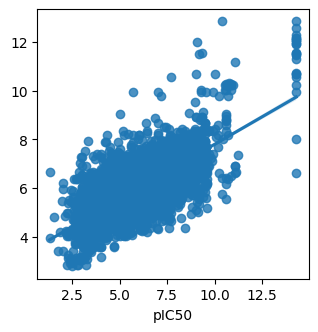

In [117]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [118]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))
